In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/housing.csv')

In [ ]:
data.shape #How many rows and columns are in the data?



(20640, 11)

In [ ]:
#How many null values are in each column?
data.isna().sum()
#the column that contains the most null values is total_bedrooms

longitude                0
latitude                 0
housing_median_age     258
total_rooms              0
total_bedrooms        4882
population              44
households            1305
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

In [ ]:
#What is the average number of total rooms and total bedrooms?
avg_total_rooms=data["total_rooms"].mean()
print(avg_total_rooms)
avg_total_bedrooms=data["total_bedrooms"].mean()
print(avg_total_bedrooms)
#avergae of them both 
cols = ['total_rooms', 'total_bedrooms']
avg_both=data[cols].mean()
print(avg_both)
#similiar answer


2635.7630813953488
539.9201040741211
total_rooms       2635.763081
total_bedrooms     539.920104
dtype: float64


In [ ]:
#What are the different ocean proximity categories that we have?
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

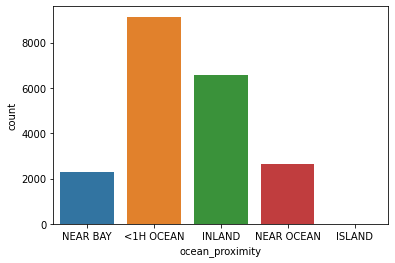

In [ ]:
#What is the most frequent ocean proximity?we can plot to make it shown better 
import seaborn as sns
sns.countplot(data=data, x='ocean_proximity')
#plot clearly shows the most frequent which is <1H OCEAN 

In [ ]:
#What is the average median income overall?
avg_median_income=data["median_income"].mean()
print(avg_total_bedrooms)

539.9201040741211


In [ ]:
#What is the average population for houses in a block where the median income is more than $80,0000?
avg_pop=data.query("median_income>8").population.mean()
print(avg_pop)

1262.5152905198777


In [ ]:
#What is the maximum and minimum number of total rooms for houses that are located inland?
df=data
df[df['ocean_proximity']=='INLAND'].total_rooms.min()

2

In [ ]:
df2=data.groupby('ocean_proximity').mean()['median_house_value']

In [ ]:
max_value=data.loc[data['ocean_proximity']=='INLAND'].max()
print(max_value)

longitude             -114.31
latitude                41.95
housing_median_age       52.0
total_rooms             39320
total_bedrooms         6210.0
population            16305.0
median_income         15.0001
median_house_value     500001
ocean_proximity        INLAND
dtype: object


<ipython-input-11-0d38b3cb1595>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  max_value=data.loc[data['ocean_proximity']=='INLAND'].max()


In [ ]:
data.groupby('ocean_proximity').mean()['median_house_value']

ocean_proximity
<1H OCEAN     240084.285464
INLAND        124805.392001
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
Name: median_house_value, dtype: float64

In [ ]:
#The average housing median age for houses located near ocean is more than houses located inland
avg_hma=data.groupby('ocean_proximity').mean()
print(avg_hma)

                  longitude   latitude  housing_median_age  total_rooms  \
ocean_proximity                                                           
<1H OCEAN       -118.847766  34.560577           29.356692  2628.343586   
INLAND          -119.732990  36.731829           24.243496  2717.742787   
ISLAND          -118.354000  33.358000           42.400000  1574.600000   
NEAR BAY        -122.260694  37.801057           37.666960  2493.589520   
NEAR OCEAN      -119.332555  34.738439           29.365725  2583.700903   

                 total_bedrooms   population  median_income  \
ocean_proximity                                               
<1H OCEAN            544.260720  1520.392363       4.223484   
INLAND               540.172075  1390.907257       3.156707   
ISLAND               420.400000   668.000000       2.744420   
NEAR BAY             520.746541  1231.007891       4.172885   
NEAR OCEAN           539.648895  1349.007544       4.233445   

                 median_house_va